### Harris特征点检测器-兴趣点检测

>#### 理解Harris特征点检测算法的思想和数学原理

>#### 学会利用OpenCV的Harris算子进行兴趣点检测

角点

图像梯度

设$w(x,y)$为位置$(x,y)$处的窗口函数，表示窗口内各像素的权重，最简单的就是把窗口内所有像素的权重都设为1，即一个均值滤波核。

当然，也可以把 $w(x,y)$设定为以窗口中心为原点的高斯分布，即一个高斯核。


度图的协方差矩阵


一个图像上有多个特征，找到这些图像特征的过程被称为特征提取，特征提取决定了最终目标识别效果的好坏。角点特征是比较好的特征，就像拼图一样，往往四个顶点是比较容易找到的，也是最开始拼的。

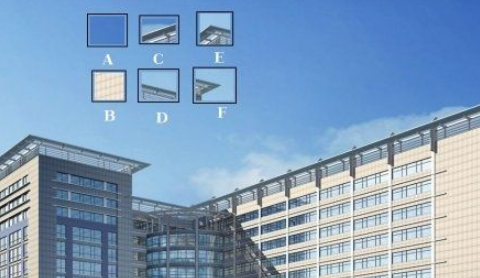

角点：一阶导数(即灰度图的梯度)中的局部最大所对应的像素点，角点在任意一个方向上做微小移动，都会引起该区域的梯度图的方向和幅值发生很大变化。

Harris 检测器具有旋转不变性，但不具有尺度不变性

Harris 角点检测器大致思想是，先找到窗口，再在窗口内部找到角点
1、当窗口（小的图像片段）同时向 x 和 y 两个方向移动时，计算窗口内部的像素值变化量 [公式] ；
2、对于每个窗口，都计算其对应的一个角点响应函数 R；
3、然后对该函数进行阈值处理，如果 R > threshold，表示该窗口对应一个角点特征。

性能较好的角点：

检测出图像中“真实”的角点
准确的定位性能  
很高的重复检测率  ？？ 不同窗口都能检测到
噪声的鲁棒性   ？？啥 引入了噪声因素 还能查到
较高的计算效率   ？？计算效率不都差不多吗

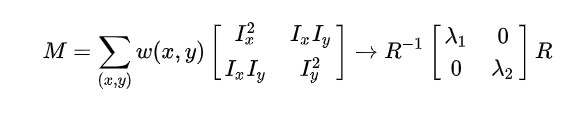

λ1 和 λ2是两个正交方向的变化分量，R是旋转因子
模型中通过判断两个特征值的大小，来判定像素的属性。

拆分成这种矩阵形式有什么用？

对于某个由多个向量加权组成的向量c，当它乘上矩阵A，其中特征值较大的向量占比就会增加，而特征值较大的向量就会被压缩

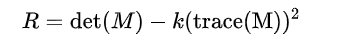

以角点响应函数R衡量每个窗口的灰度变化，k是一个经验常数，在范围 (0.04, 0.06) 之间。

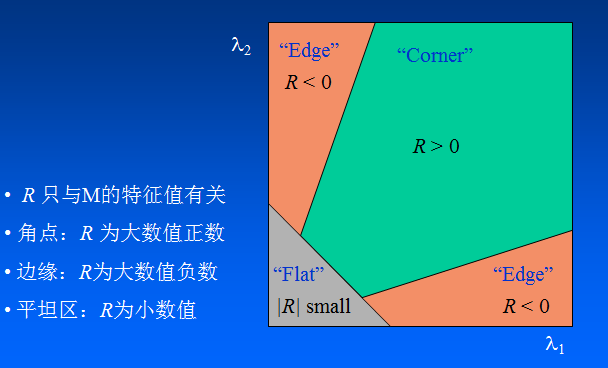

根据 R 的值，将这个窗口所在的区域划分为平面、边缘或角点。为了得到最优的角点，我们还可以使用非极大值抑制。
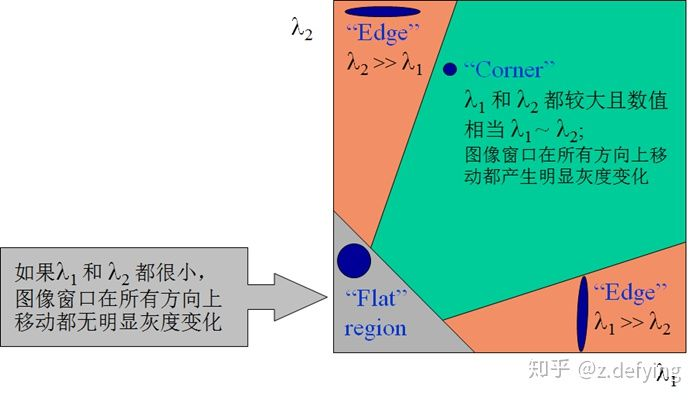

拆分成这种矩阵形式有什么用？

对于某个由多个向量加权组成的向量c，当它乘上矩阵A，其中特征值较大的向量占比就会增加，而特征值较大的向量就会被压缩
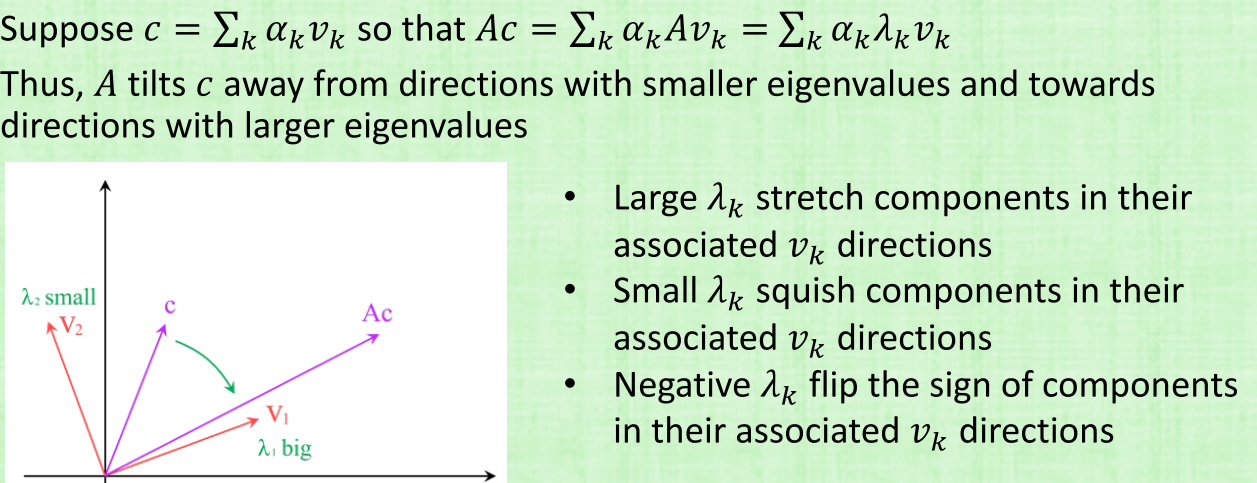


#### 特征值越大，矩阵被压缩的越严重

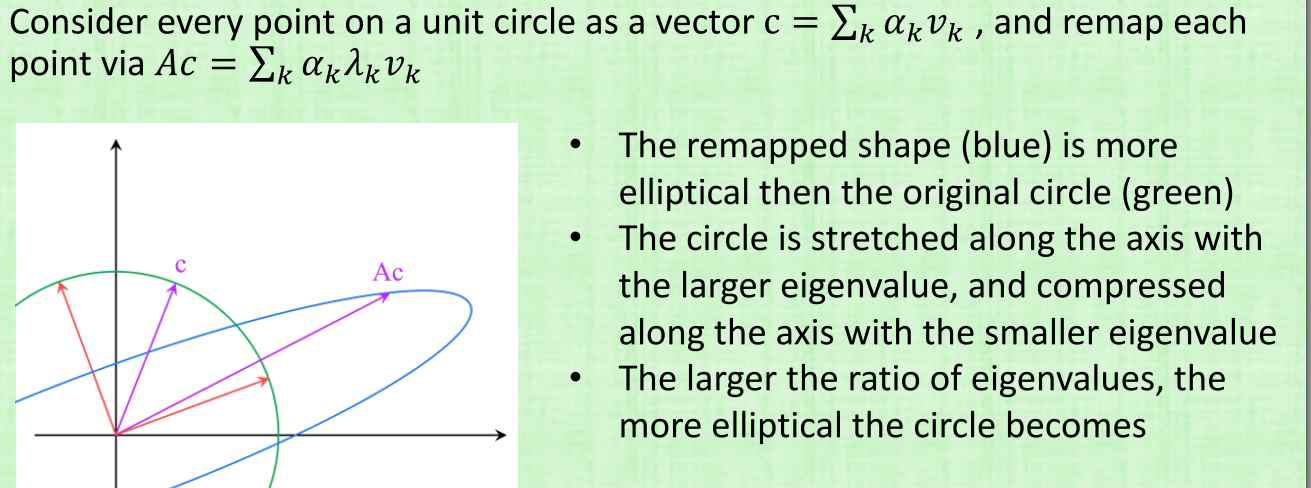



每当我们用数字描述向量时，它都依赖于我们正在使用的基。线性描述是操纵空间的一种手段，它保持网格线平行，且等距相等，并且保持原点不动，令人高兴的是，这种变换只需要几个数字就能描述清楚。这些数字就是变换后基向量的坐标。以这些坐标为列所构成的矩阵为我们提供了一种描述线性变换的语言，而矩阵向量乘法就是计算线性变换作用于给定向量的一种途径，每当你看到一个矩阵都可以把它解读为对空间的一种特定变换
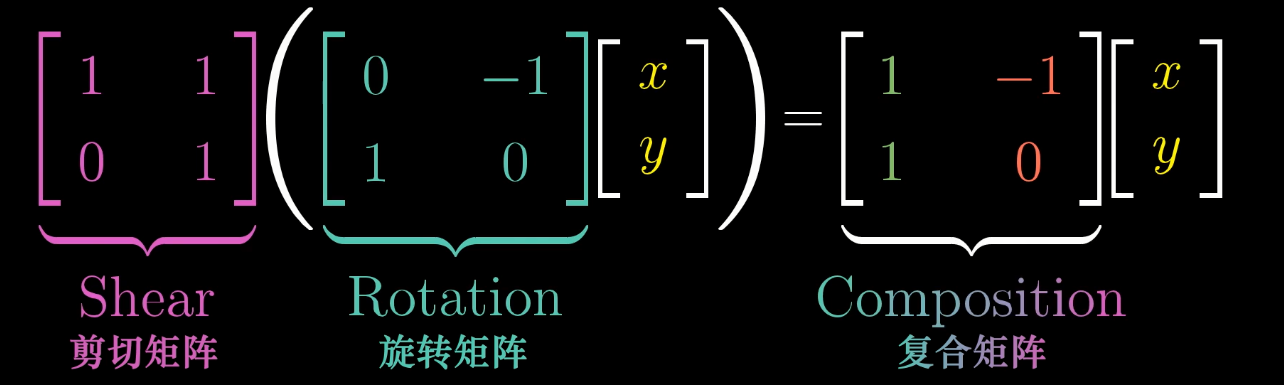

In [3]:
import cv2
import numpy as np

In [4]:
# detector parameters
block_size = 5
sobel_size = 3
k = 0.04

In [11]:
photo_path = 'C:/Users/Administrator/Desktop/chaoyue.jpeg'

In [12]:
image = cv2.imread('photo_path')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# modify the data type setting to 32-bit floating point 
gray_img = np.float32(gray_img)

# detect the corners with appropriate values as input parameters
corners_img = cv2.cornerHarris(gray_img, block_size, sobel_size, k)

# result is dilated for marking the corners, not necessary
dst = cv.dilate(corners_img, None)

# Threshold for an optimal value, marking the corners in Green
image[corners_img>0.01*corners_img.max()] = [0,0,255]

cv2.imwrite('new_bird.jpg', image)